In [39]:
import nilearn
from nilearn import datasets, image, plotting
import numpy as np
import nibabel as nib
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import new_img_like
#import numpy as np
from nilearn import image
#from nilearn.input_data import NiftiLabelsMasker


[get_dataset_dir] Dataset found in /Users/m2air/nilearn_data/schaefer_2018

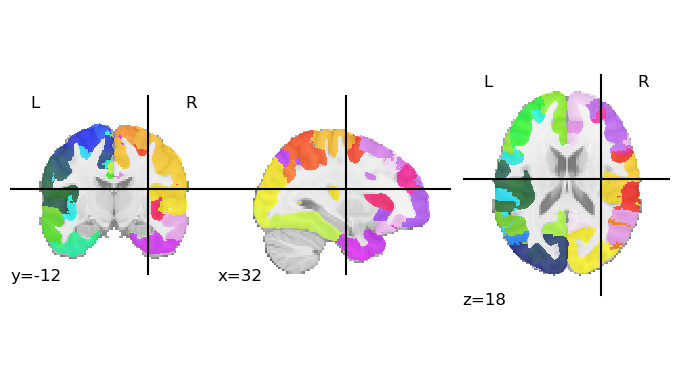

In [40]:
atlas = datasets.fetch_atlas_schaefer_2018()
plotting.plot_roi(atlas.maps)

/Users/m2air/miniconda3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



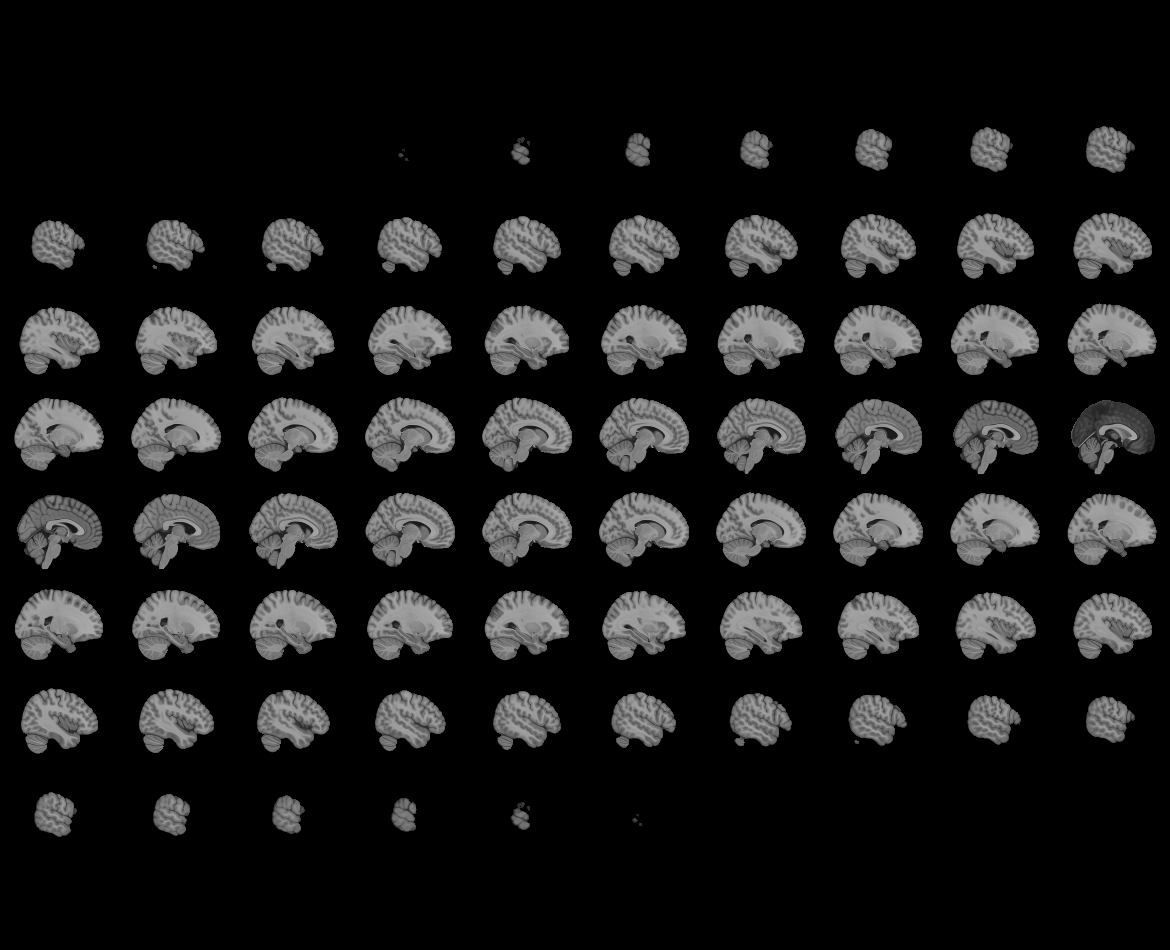
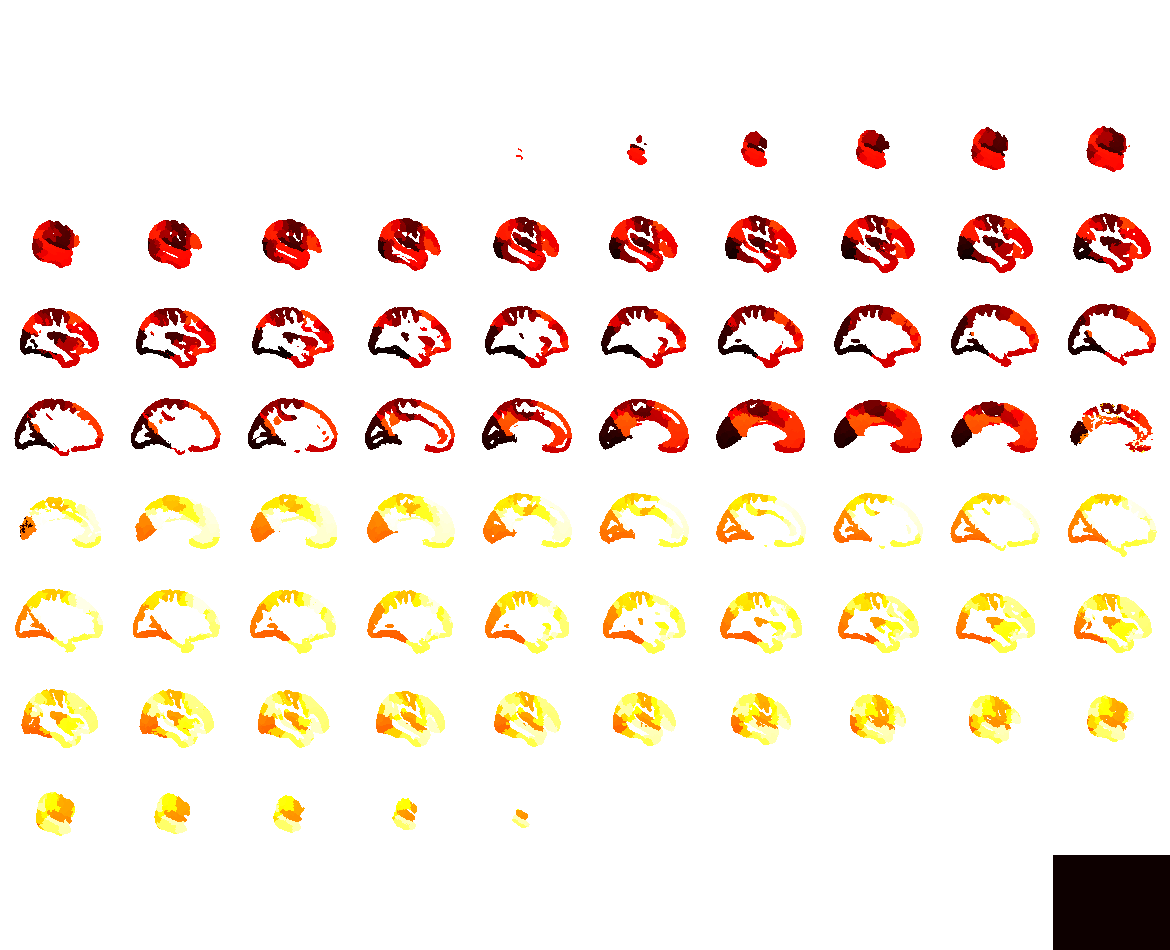

In [41]:
plotting.view_img(atlas.maps)

In [42]:
import nilearn
nilearn.datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=7, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
atlas_img = image.load_img(atlas['maps'])  # .nii.gz
labels = atlas['labels']

[get_dataset_dir] Dataset found in /Users/m2air/nilearn_data/schaefer_2018

In [147]:
from nilearn import image
file_path = "/Volumes/SSD/ds003721-download/Processed/Preprocessing_film/S09/Results/errts_S09.nii"

bold_img = image.load_img(file_path)
print(bold_img.shape)
print(atlas_img.shape)

(96, 114, 96, 2100)
(182, 218, 182)


In [148]:
from nilearn.image import resample_to_img

atlas_resampled = resample_to_img(atlas_img, bold_img, interpolation='nearest')


/var/folders/_w/vwhzp6ss24j30595sp9s9d900000gn/T/ipykernel_36578/344514781.py:3: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  atlas_resampled = resample_to_img(atlas_img, bold_img, interpolation='nearest')
/Users/m2air/miniconda3/lib/python3.12/site-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


In [149]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=atlas_resampled, standardize=True, n_jobs=4)
time_series = masker.fit_transform(bold_img)
print(time_series.shape)

(2100, 400)


In [47]:
#trial 
from nilearn import image
from nilearn.input_data import NiftiLabelsMasker

# 只取前300個時間點
bold_img_part = image.index_img(bold_img, slice(0, 300))

# 使用之前已重採樣好的 atlas_resampled
masker = NiftiLabelsMasker(labels_img=atlas_resampled, standardize=True, n_jobs=4)

# 萃取部分時間點的時間序列
time_series_part = masker.fit_transform(bold_img_part)

print(time_series_part.shape)  # 應該會是 (300, 400)


KeyboardInterrupt: 

In [142]:
labels = atlas['labels']
dmn_labels_bytes = [label for label in labels if b'PFCd' in label]

dmn_labels_str = [label.decode('utf-8') for label in dmn_labels_bytes]

print(":")
for label in dmn_labels_str:
    print(label)

:
7Networks_RH_Default_PFCdPFCm_1
7Networks_RH_Default_PFCdPFCm_2
7Networks_RH_Default_PFCdPFCm_3
7Networks_RH_Default_PFCdPFCm_4
7Networks_RH_Default_PFCdPFCm_5
7Networks_RH_Default_PFCdPFCm_6
7Networks_RH_Default_PFCdPFCm_7
7Networks_RH_Default_PFCdPFCm_8
7Networks_RH_Default_PFCdPFCm_9
7Networks_RH_Default_PFCdPFCm_10
7Networks_RH_Default_PFCdPFCm_11
7Networks_RH_Default_PFCdPFCm_12
7Networks_RH_Default_PFCdPFCm_13


In [120]:
specific_dmn_labels_str = [
    "7Networks_LH_Cont_PFCv_1",
    "7Networks_RH_Cont_PFCv_1",
    "7Networks_RH_Default_PFCv_1",
    "7Networks_RH_Default_PFCv_2",
    "7Networks_RH_Default_PFCv_3",
    "7Networks_RH_Default_PFCv_4"
]
specific_dmn_labels_bytes = [label.encode('utf-8') for label in specific_dmn_labels_str]


# 獲取這些特定 DMN 標籤對應的 ROI 編號
specific_dmn_roi_indices = []
for i, label_byte in enumerate(labels):
    if label_byte in specific_dmn_labels_bytes:
        specific_dmn_roi_indices.append(i + 1) # ROI 編號是索引 + 1

print(f"\n找到 {len(specific_dmn_roi_indices)} 個您提供的特定 DMN ROI 編號。")
print(f"這些 ROI 編號是: {sorted(specific_dmn_roi_indices)}")



找到 6 個您提供的特定 DMN ROI 編號。
這些 ROI 編號是: [143, 340, 375, 376, 377, 378]


In [151]:
specific_dmn_labels_str = [
    "7Networks_RH_Default_PFCdPFCm_1",
    "7Networks_RH_Default_PFCdPFCm_2",
    "7Networks_RH_Default_PFCdPFCm_3",
    "7Networks_RH_Default_PFCdPFCm_4",
    "7Networks_RH_Default_PFCdPFCm_5",
    "7Networks_RH_Default_PFCdPFCm_6",
    "7Networks_RH_Default_PFCdPFCm_7",
    "7Networks_RH_Default_PFCdPFCm_8",
    "7Networks_RH_Default_PFCdPFCm_9",
    "7Networks_RH_Default_PFCdPFCm_10",
    "7Networks_RH_Default_PFCdPFCm_11",
    "7Networks_RH_Default_PFCdPFCm_12",
    "7Networks_RH_Default_PFCdPFCm_13"
]
specific_dmn_labels_bytes = [label.encode('utf-8') for label in specific_dmn_labels_str]


# 獲取這些特定 DMN 標籤對應的 ROI 編號
specific_dmn_roi_indices = []
for i, label_byte in enumerate(labels):
    if label_byte in specific_dmn_labels_bytes:
        specific_dmn_roi_indices.append(i + 1) # ROI 編號是索引 + 1

print(f"\n找到 {len(specific_dmn_roi_indices)} 個您提供的特定 DMN ROI 編號。")
print(f"這些 ROI 編號是: {sorted(specific_dmn_roi_indices)}")



找到 13 個您提供的特定 DMN ROI 編號。
這些 ROI 編號是: [379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391]


In [152]:
atlas_data = atlas_resampled.get_fdata()

In [153]:
dmn_mask_data_specific = np.where(np.isin(atlas_data, specific_dmn_roi_indices), atlas_data, 0)

dmn_mask_img_specific = new_img_like(atlas_resampled, dmn_mask_data_specific, copy_header=True)

# 6. 提取這些特定 DMN 區域的時間序列
masker = NiftiLabelsMasker(labels_img=dmn_mask_img_specific, standardize=True, n_jobs=4)

time_series_specific_dmn = masker.fit_transform(bold_img)

print(f"\n最終特定 DMN 時間序列的形狀: {time_series_specific_dmn.shape}")


最終特定 DMN 時間序列的形狀: (2100, 13)


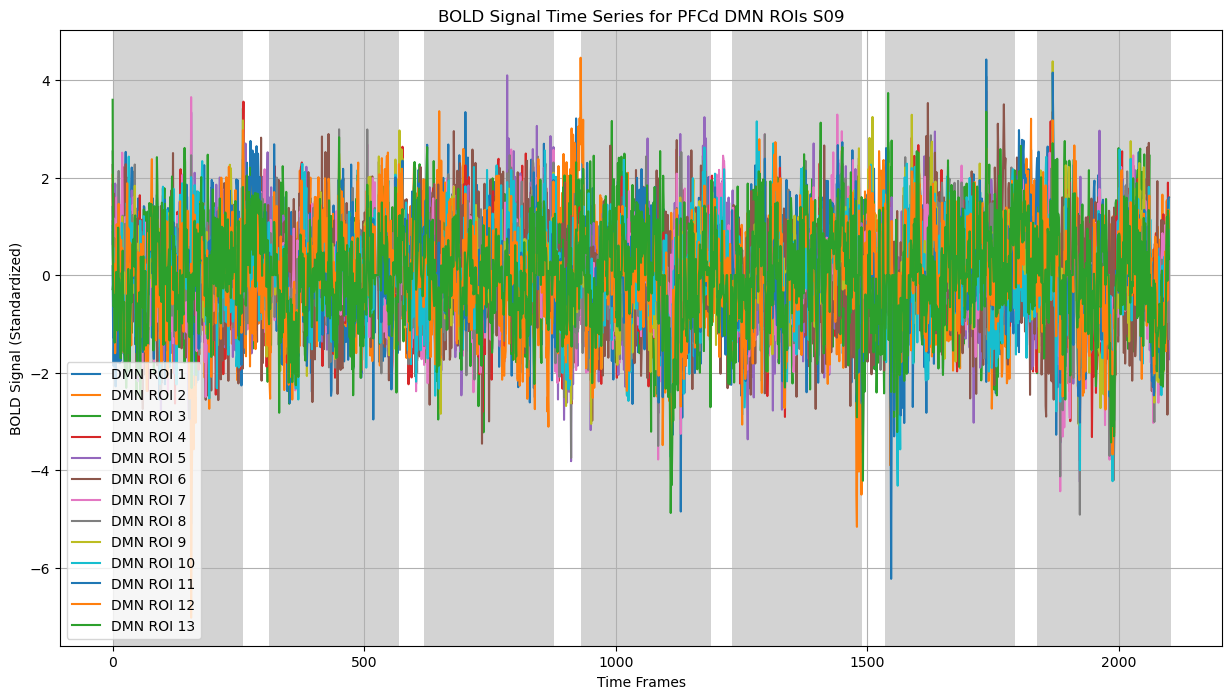

In [155]:
import matplotlib.pyplot as plt

# 假設 time_series_dmn 的形狀是 (2100, 35)
num_dmn_rois = time_series_specific_dmn.shape[1]

plt.figure(figsize=(15, 8))
for i in range(min(13, num_dmn_rois)): # 這裡只繪製前5個DMN ROI的時序作為範例
    plt.plot(time_series_specific_dmn[:, i], label=f'DMN ROI {i+1}') # 可以根據 labels 獲取實際的 ROI 名稱
    rest0 = [3, 256]
    rest1 = [313, 566]
    rest2 = [620,873]
    rest3 = [933, 1186]
    rest4 = [1232,1485]
    rest5 = [1537,1790]
    rest6 = [1838, 2100]
    rest_periods = [rest0,rest1, rest2, rest3, rest4,rest5,rest6]
    for rest in rest_periods:
        plt.axvspan(xmin=rest[0], xmax=rest[1], ymax=1, color="lightgray",zorder=0)

plt.title('BOLD Signal Time Series for PFCd DMN ROIs S09')
plt.xlabel('Time Frames')
plt.ylabel('BOLD Signal (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


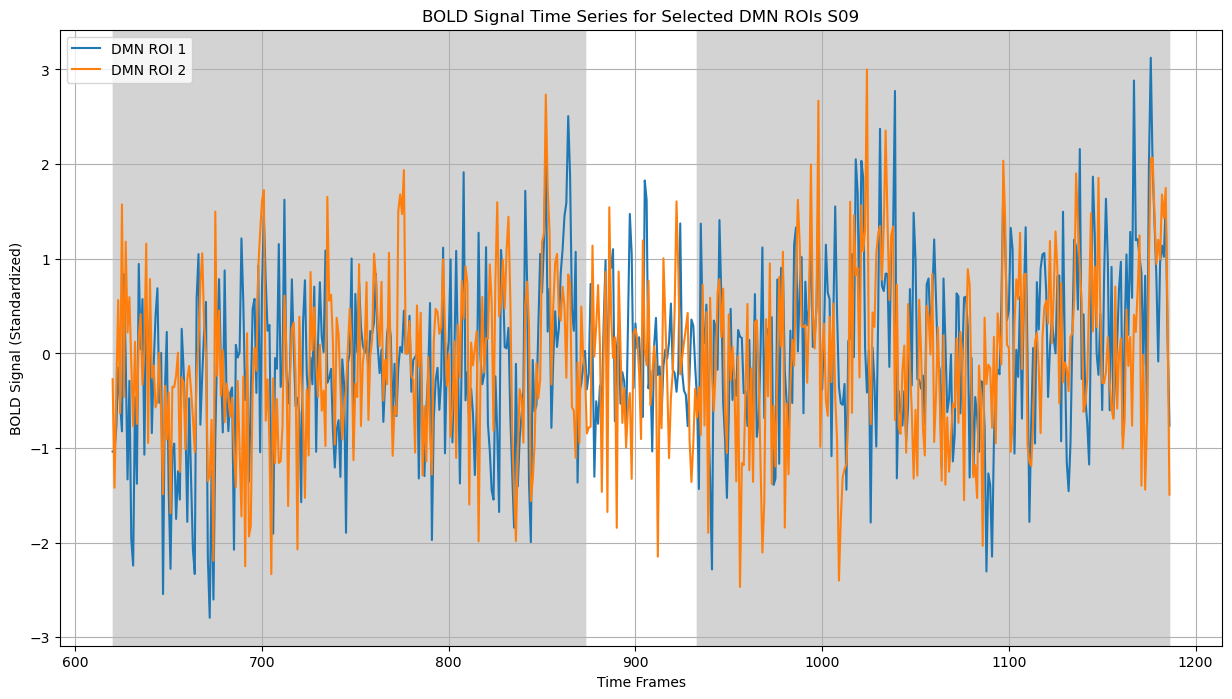

In [75]:
import matplotlib.pyplot as plt

# 假設 time_series_dmn 的形狀是 (2100, 35)
num_dmn_rois = time_series_specific_dmn.shape[1]

start_frame = 620
end_frame = 1186 # 這裡設定為您想要的結束幀

plt.figure(figsize=(15, 8))
for i in range(min(2, num_dmn_rois)): # 這裡只繪製前5個DMN ROI的時序作為範例
    plt.plot(range(start_frame, end_frame + 1), time_series_specific_dmn[start_frame:end_frame + 1, i], label=f'DMN ROI {i+1}')
    rest0 = [3, 256]
    rest1 = [313, 566]
    rest2 = [620,873]
    rest3 = [933, 1186]
    rest4 = [1232,1485]
    rest5 = [1537,1790]
    rest6 = [1838, 2100]
    rest_periods = [rest0,rest1, rest2, rest3, rest4,rest5,rest6]
    for rest in rest_periods:
        # 只繪製在 [start_frame, end_frame] 範圍內的 rest periods
        # 確保 rest 區間與繪圖區間有交集
        # 裁剪 rest 區間使其落在當前繪圖範圍內
        plot_rest_xmin = max(rest[0], start_frame)
        plot_rest_xmax = min(rest[1], end_frame)

        if plot_rest_xmin < plot_rest_xmax: # 只有當有實際交集時才繪製
            plt.axvspan(xmin=plot_rest_xmin, xmax=plot_rest_xmax, ymax=1, color="lightgray", zorder=0)


plt.title('BOLD Signal Time Series for Selected DMN ROIs S09')
plt.xlabel('Time Frames')
plt.ylabel('BOLD Signal (Standardized)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


dmn_parcels = [15, 20, 35, ...]  # 這是示範，要用正確編號d
atlas_data = atlas_resampled.get_fdata()
dmn_mask_data = np.where(np.isin(atlas_data, dmn_parcels), atlas_data, 0)

# 建立新的 DMN mask image
dmn_mask_img = new_img_like(atlas_resampled, dmn_mask_data)

# 萃取 DMN time series
masker = NiftiLabelsMasker(labels_img=dmn_mask_img, standardize=True, n_jobs=4)
time_series_dmn = masker.fit_transform(bold_img)

print(time_series_dmn.shape)



(2100, 3)


In [ ]:
#wrongsize
file_path = "/Volumes/SSD/ds003721-download/Processed/Preprocessing_film/S07/Results/errts_S07.nii"

bold_img = image.load_img(file_path)

# 萃取 time series
masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=True)
time_series = masker.fit_transform(bold_img)  # shape: (n_TRs, 100)

print(time_series.shape)

KeyboardInterrupt: 

In [ ]:
atlas = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr25-1mm')
atlas_img = nib.load(atlas.maps)
atlas_data = atlas_img.get_fdata()

labels = atlas.labels
for i, label in enumerate(labels):
    if "Caudate" in label or "Putamen" in label or "Pallidum" in label:
        # 找出該 label 的 voxel index
        coords = np.argwhere(atlas_data == i)
        if coords.size == 0:
            continue
        center_voxel = coords.mean(axis=0)
        center_mni = nib.affines.apply_affine(atlas_img.affine, center_voxel)
        print(f"{label}: MNI center = {np.round(center_mni, 1)}")